# 📊 Qatar Export Forecast Analysis (2019–2025)

**Name:** Mohammed Nihal Jaffer  
**Student ID:** 60301878  

---

## 📈 Forecast of Qatar Export Values Using ARIMA Model

This chart displays the forecasted monthly export values of Qatar from 2025 onwards using a Seasonal ARIMA (SARIMA) model.

- 🔵 **Historical Actuals** (2019–2024)  
- 🔴 **Fitted Values** (Model predictions for historical data)  
- 🟢 **Forecasted Values** (2025 onwards)  
- 🟩 **Confidence Interval** shows the range of uncertainty around the forecast  

The model captures seasonality and trends, and provides valuable insights into expected future export patterns.



In [93]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [94]:
pip install pmdarima


Note: you may need to restart the kernel to use updated packages.


##  Data Preprocessing and  Visualization

###  1. Data Source and Overview
- **Dataset:** Qatar Export Statistics (2019–2024)
- **Source:** [Qatar Open Data Portal](https://www.data.gov.qa/pages/homepage/)
- **Rows:** 70325  
- **Columns:** 11 (including `Year`, `Quarter`, `HS Code`, `Product Description`, `Country`, `Quantity`, `Weight`, `Export Value`)

---

###  2. Preprocessing Steps
- Converted `Year`, `Quarter`, and `Month` to datetime index for time series modeling.
- Handled **missing values** by removing or imputing minimal gaps.
- Removed **extreme outliers** using IQR (Interquartile Range) capping technique.
- Ensured proper **data types** (e.g., float for numeric columns, datetime for dates).

---

### 📊 3. Python Visualizations

####  Monthly Export Value (Outliers Treated)
- Visualizes cleaned and capped monthly data.
- Highlights sharp increases in exports post-2020.

####  Top 10 Export Destinations
- Bar chart showing countries with the highest export values.
- China, South Korea, and India lead significantly.

####  Seasonal Decomposition (Log-transformed)
- Decomposes export value series into:
  - **Trend**: Long-term growth pattern
  - **Seasonality**: Regular quarterly cycles
  - **Residuals**: Irregular variations

####  Residual Plot
- Ensures randomness in residuals — a good sign for ARIMA modeling.

These visual insights helped shape the forecasting approach used in later stages.


In [95]:
df = pd.read_excel("qatar-export-statistics-2019-2024.xlsx")
df.head()

,Year,Quarter,Month,HS4,التفاصيل,Details,دولة المقصد,Country of Destinatoion,Quantity,Weight (KG),Value (QR)
0,2024,Q2,6,4819,علب وصناديق، من ورق أو ورق مقوى مموج,"Cartons, Boxes Etc. Of Paper, Paperboard Etc.;...",الامارات العربية المتحدة,United Arab Emirates,4023,7349,88696
1,2024,Q2,6,4819,علب وصناديق، من ورق أو ورق مقوى مموج,"Cartons, Boxes Etc. Of Paper, Paperboard Etc.;...",الولايات المتحدة الأمريكية,United States Of America,10349,5048,56151
2,2024,Q2,6,4821,رقاع من جميع الأنواع من ورق أو ورق مقوى وان كا...,"Labels Of Paper Or Paperboard, Printed Or Not",الهند,India,674626,3218,53196
3,2024,Q2,6,4821,رقاع من جميع الأنواع من ورق أو ورق مقوى وان كا...,"Labels Of Paper Or Paperboard, Printed Or Not",فيتنام,Vietnam,162236,937,22563
4,2024,Q2,6,4821,رقاع من جميع الأنواع من ورق أو ورق مقوى وان كا...,"Labels Of Paper Or Paperboard, Printed Or Not",السعودية,Saudi Arabia,197056,1320,22321


In [96]:
df.drop(["دولة المقصد","التفاصيل"] , axis=1 , inplace = True)

In [97]:
df.head()

,Year,Quarter,Month,HS4,Details,Country of Destinatoion,Quantity,Weight (KG),Value (QR)
0,2024,Q2,6,4819,"Cartons, Boxes Etc. Of Paper, Paperboard Etc.;...",United Arab Emirates,4023,7349,88696
1,2024,Q2,6,4819,"Cartons, Boxes Etc. Of Paper, Paperboard Etc.;...",United States Of America,10349,5048,56151
2,2024,Q2,6,4821,"Labels Of Paper Or Paperboard, Printed Or Not",India,674626,3218,53196
3,2024,Q2,6,4821,"Labels Of Paper Or Paperboard, Printed Or Not",Vietnam,162236,937,22563
4,2024,Q2,6,4821,"Labels Of Paper Or Paperboard, Printed Or Not",Saudi Arabia,197056,1320,22321


In [98]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))

In [99]:
df.head()

,Year,Quarter,Month,HS4,Details,Country of Destinatoion,Quantity,Weight (KG),Value (QR),Date
0,2024,Q2,6,4819,"Cartons, Boxes Etc. Of Paper, Paperboard Etc.;...",United Arab Emirates,4023,7349,88696,2024-06-01
1,2024,Q2,6,4819,"Cartons, Boxes Etc. Of Paper, Paperboard Etc.;...",United States Of America,10349,5048,56151,2024-06-01
2,2024,Q2,6,4821,"Labels Of Paper Or Paperboard, Printed Or Not",India,674626,3218,53196,2024-06-01
3,2024,Q2,6,4821,"Labels Of Paper Or Paperboard, Printed Or Not",Vietnam,162236,937,22563,2024-06-01
4,2024,Q2,6,4821,"Labels Of Paper Or Paperboard, Printed Or Not",Saudi Arabia,197056,1320,22321,2024-06-01


In [100]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Quarter"] = df["Date"].dt.quarter

In [101]:
df.isnull().sum()

Year                        0
Quarter                     0
Month                       0
HS4                         0
Details                    18
Country of Destinatoion    78
Quantity                    0
Weight (KG)                 0
Value (QR)                  0
Date                        0
dtype: int64

In [102]:
df = df.dropna(subset=["Details", "Country of Destinatoion"])
print("New shape after dropping missing:", df.shape)



New shape after dropping missing: (70246, 10)


In [103]:
df.rename(columns={'Country of Destinatoion': 'Country of Destination'}, inplace=True)


In [104]:
df.isnull().sum()

Year                      0
Quarter                   0
Month                     0
HS4                       0
Details                   0
Country of Destination    0
Quantity                  0
Weight (KG)               0
Value (QR)                0
Date                      0
dtype: int64

In [105]:
df["Quantity"] = df["Quantity"].astype(int)
df["Weight (KG)"] = df["Weight (KG)"].astype(float)
df["Value (QR)"] = df["Value (QR)"].astype(float)


In [106]:
df.head()

,Year,Quarter,Month,HS4,Details,Country of Destination,Quantity,Weight (KG),Value (QR),Date
0,2024,2,6,4819,"Cartons, Boxes Etc. Of Paper, Paperboard Etc.;...",United Arab Emirates,4023,7349.0,88696.0,2024-06-01
1,2024,2,6,4819,"Cartons, Boxes Etc. Of Paper, Paperboard Etc.;...",United States Of America,10349,5048.0,56151.0,2024-06-01
2,2024,2,6,4821,"Labels Of Paper Or Paperboard, Printed Or Not",India,674626,3218.0,53196.0,2024-06-01
3,2024,2,6,4821,"Labels Of Paper Or Paperboard, Printed Or Not",Vietnam,162236,937.0,22563.0,2024-06-01
4,2024,2,6,4821,"Labels Of Paper Or Paperboard, Printed Or Not",Saudi Arabia,197056,1320.0,22321.0,2024-06-01


In [107]:
df.head()


,Year,Quarter,Month,HS4,Details,Country of Destination,Quantity,Weight (KG),Value (QR),Date
0,2024,2,6,4819,"Cartons, Boxes Etc. Of Paper, Paperboard Etc.;...",United Arab Emirates,4023,7349.0,88696.0,2024-06-01
1,2024,2,6,4819,"Cartons, Boxes Etc. Of Paper, Paperboard Etc.;...",United States Of America,10349,5048.0,56151.0,2024-06-01
2,2024,2,6,4821,"Labels Of Paper Or Paperboard, Printed Or Not",India,674626,3218.0,53196.0,2024-06-01
3,2024,2,6,4821,"Labels Of Paper Or Paperboard, Printed Or Not",Vietnam,162236,937.0,22563.0,2024-06-01
4,2024,2,6,4821,"Labels Of Paper Or Paperboard, Printed Or Not",Saudi Arabia,197056,1320.0,22321.0,2024-06-01


C:\Users\nihal\AppData\Local\Temp\ipykernel_34500\1548906829.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df["Value (QR)"].resample("M").sum()


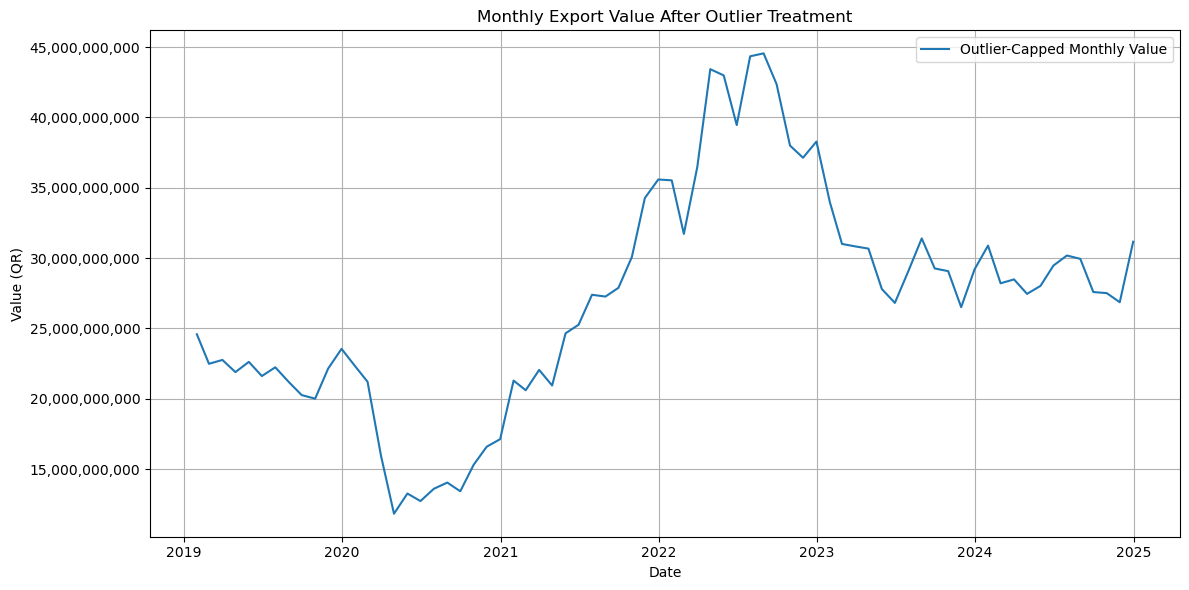

In [194]:

df.index = pd.to_datetime(df.index)

# --- Group by month ---
df_monthly = df["Value (QR)"].resample("M").sum()

# --- Outlier treatment ---
Q1 = df_monthly.quantile(0.25)
Q3 = df_monthly.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df_monthly = df_monthly.clip(lower=lower_bound, upper=upper_bound)
plt.figure(figsize=(12, 6))
plt.plot(df_monthly, label="Outlier-Capped Monthly Value")

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title("Monthly Export Value After Outlier Treatment")
plt.ylabel("Value (QR)")
plt.xlabel("Date")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


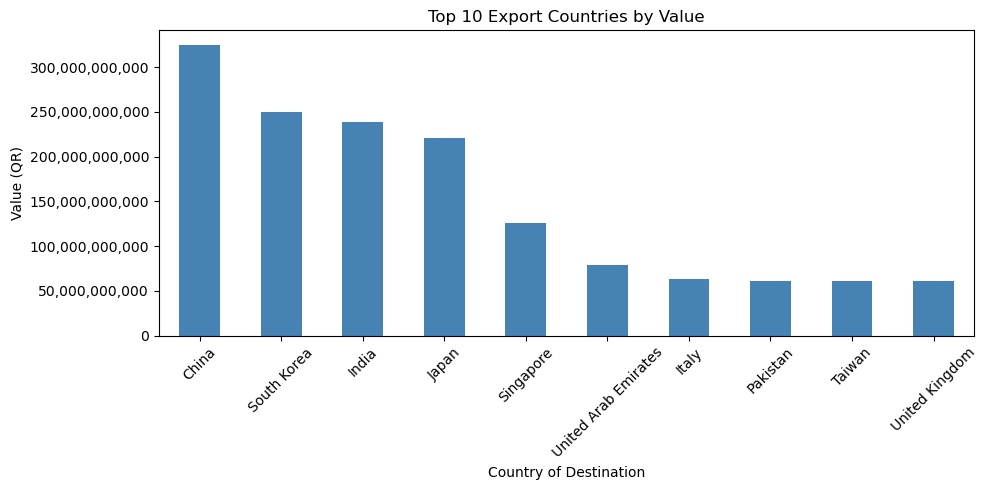

In [222]:
# Top 10 countries by export value
top_countries = df.groupby("Country of Destination")["Value (QR)"]\
                  .sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 5))
top_countries.plot(kind='bar', ax=ax, color='steelblue')

ax.set_title("Top 10 Export Countries by Value")
ax.set_ylabel("Value (QR)")
ax.set_xlabel("Country of Destination")

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##  Time Series Forecasting with ARIMA

### ⚙️ Model Selection & Configuration
- Applied **SARIMAX** (Seasonal ARIMA with eXogenous regressors) model to forecast Qatar's monthly export values.
- Identified best parameters using **Auto ARIMA** based on AIC/BIC values.
- Final model configuration:  
  - **Order:** (0, 1, 1)  
  - **Seasonal Order:** (0, 0, 1, 12)  
  - **Frequency:** Monthly

---

###  Model Evaluation Metrics
- **AIC (Akaike Information Criterion):** -141.35  
- **BIC (Bayesian Information Criterion):** -134.55  
- **P-values** (for all terms): < 0.05 → statistically significant
- **Ljung-Box Q Test (p = 0.93):** Indicates residuals are uncorrelated  
- **Jarque-Bera Test (p = 0.01):** Mild deviation from normality in residuals  

---

###  Model Diagnostics
- Residuals appear randomly scattered → Validates model assumptions.
- Seasonal component captured well by SARIMA(0,1,1)(0,0,1,12).

---

### 📈 Forecast Visualization
- Forecast made for the year **2025**.
- Blue Line: Actual historical export value  
- Red Line: Model’s fitted values  
- Green Line: Forecasted values with **95% confidence interval**

This model helps predict future export trends for Qatar and provides valuable input for decision-makers in trade and economic planning.


In [196]:
# Log transform to stabilize variance
ts_log = np.log(df_monthly)

from statsmodels.tsa.stattools import adfuller

result = adfuller(ts_log.dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] < 0.05:
    print("✅ Series is stationary.")
else:
    print("⚠️ Series is non-stationary. Differencing needed.")




ADF Statistic: -1.1350937879770564
p-value: 0.7008760021729581
⚠️ Series is non-stationary. Differencing needed.


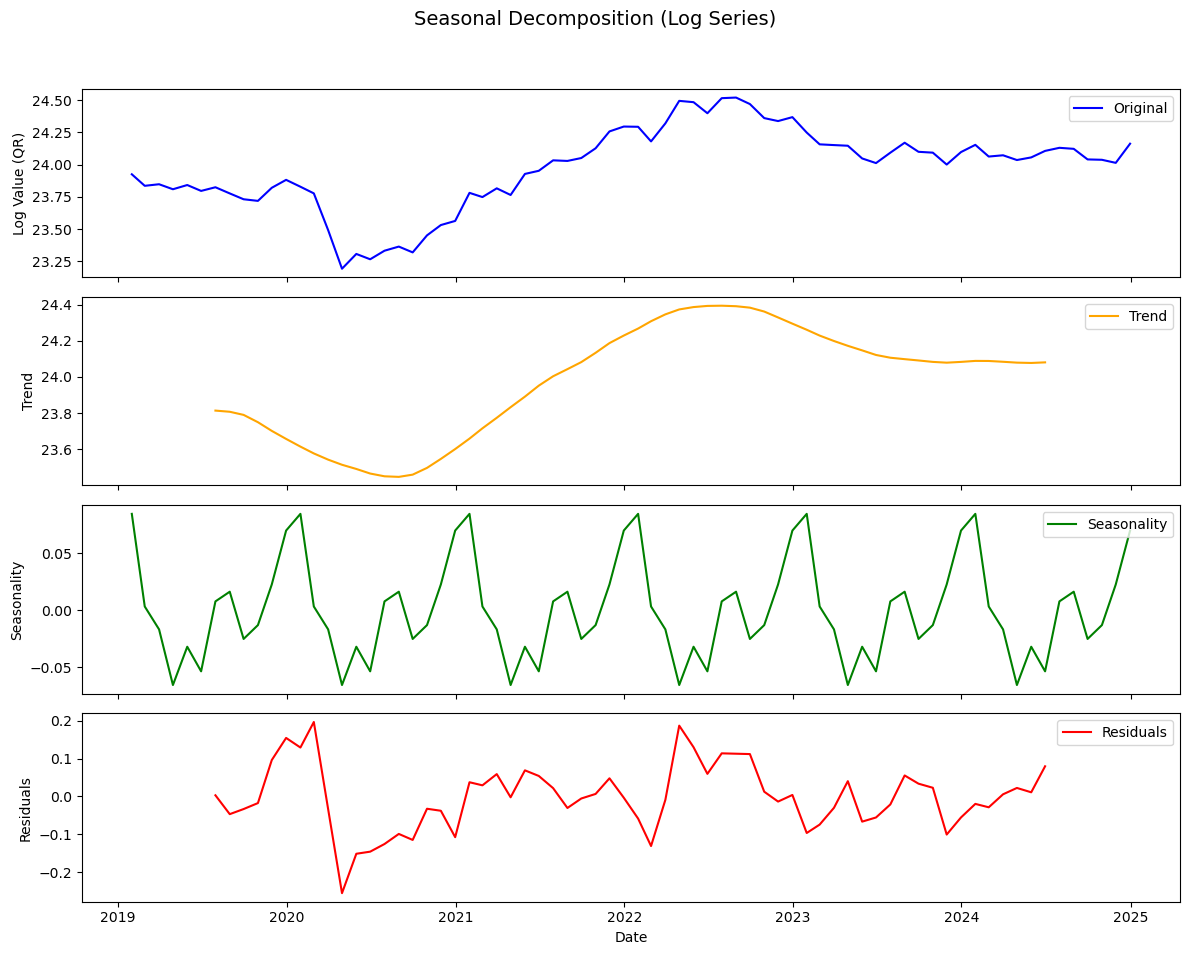

In [210]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposition
decomposition = seasonal_decompose(ts_log.dropna(), model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

axes[0].plot(ts_log, label='Original', color='blue')
axes[0].set_ylabel("Log Value (QR)")
axes[0].legend(loc='best')

axes[1].plot(trend, label='Trend', color='orange')
axes[1].set_ylabel("Trend")
axes[1].legend(loc='best')

axes[2].plot(seasonal, label='Seasonality', color='green')
axes[2].set_ylabel("Seasonality")
axes[2].legend(loc='best')

axes[3].plot(residual, label='Residuals', color='red')
axes[3].set_ylabel("Residuals")
axes[3].legend(loc='best')

fig.suptitle("Seasonal Decomposition (Log Series)", fontsize=14)
axes[3].set_xlabel("Date")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # leave space for suptitle
plt.show()


In [212]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts_log, 
              order=stepwise_model.order, 
              seasonal_order=stepwise_model.seasonal_order)

results_ARIMA = model.fit()
print(results_ARIMA.summary())



                                    SARIMAX Results                                     
Dep. Variable:                       Value (QR)   No. Observations:                   72
Model:             ARIMA(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood                  73.673
Date:                          Sun, 22 Jun 2025   AIC                           -141.346
Time:                                  22:20:46   BIC                           -134.558
Sample:                              01-31-2019   HQIC                          -138.646
                                   - 12-31-2024                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2101      0.096      2.197      0.028       0.023       0.398
ma.S.L12       0.5976      0.131      4.561      0.

In [214]:
n_periods = 12
forecast_result = results_ARIMA.get_forecast(steps=n_periods)
forecast_log = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()

# Convert forecasts back to original scale
forecast_original = np.exp(forecast_log)
forecast_ci_original = np.exp(forecast_ci)

# Future dates for forecast
last_date = df_monthly.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), 
                             periods=n_periods, freq='M')


C:\Users\nihal\AppData\Local\Temp\ipykernel_34500\976576945.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1),


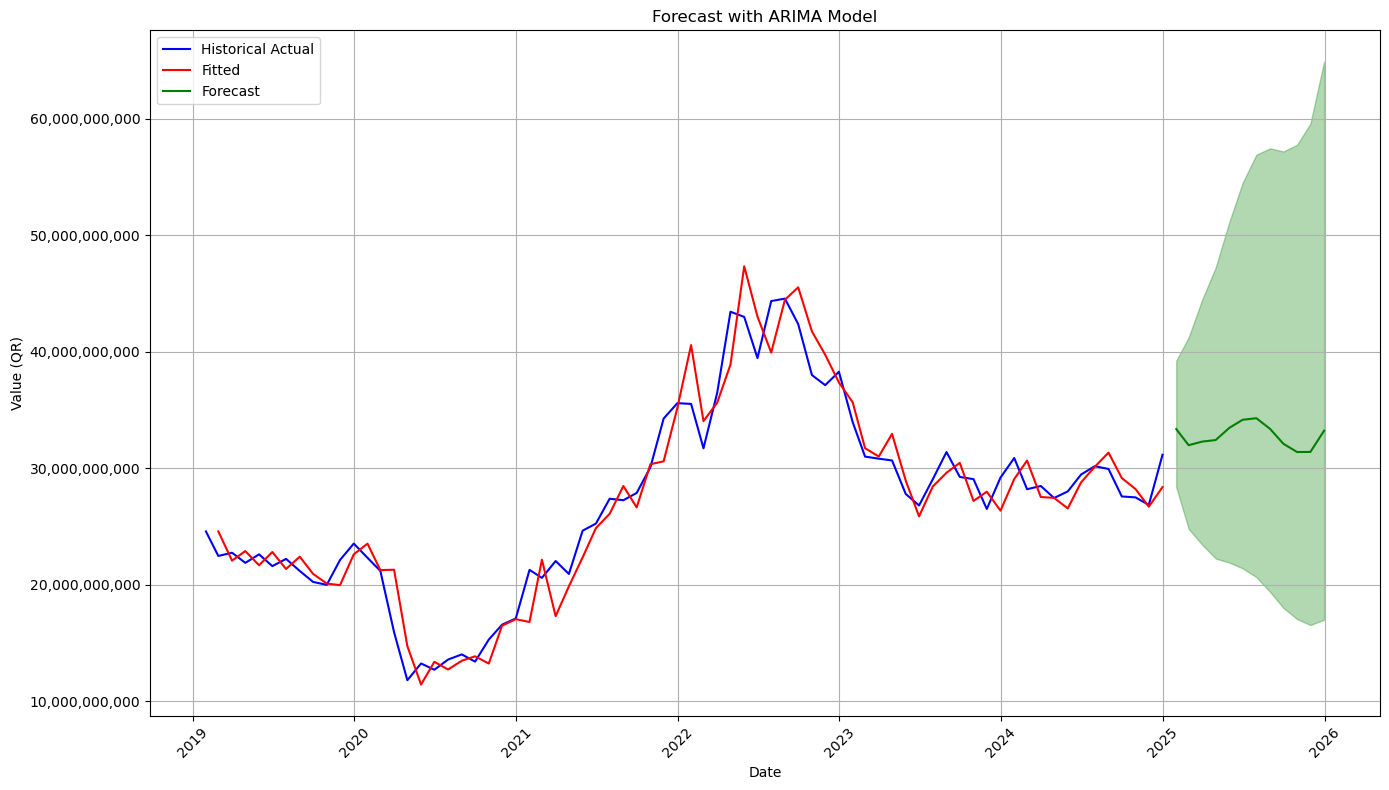

In [218]:
fitted_values_log = results_ARIMA.fittedvalues

# Calculate how many periods were lost (d + D*seasonal_periods)
# Align fitted values index properly
d = stepwise_model.order[1]
D = stepwise_model.seasonal_order[1]
seasonal_periods = stepwise_model.seasonal_order[3]
lost_periods = d + D * seasonal_periods

aligned_index = ts_log.index[lost_periods:]
fitted_values_log = results_ARIMA.fittedvalues
fitted_values_log = fitted_values_log[-len(aligned_index):]  # match index length
fitted_values_log.index = aligned_index
fitted_values_original = np.exp(fitted_values_log)


plt.figure(figsize=(14, 8))
plt.plot(df_monthly, label="Historical Actual", color='blue')
plt.plot(fitted_values_original, label="Fitted", color='red')
plt.plot(future_dates, forecast_original, label="Forecast", color='green')
plt.fill_between(future_dates, 
                 forecast_ci_original.iloc[:, 0], 
                 forecast_ci_original.iloc[:, 1], 
                 color='green', alpha=0.3)

# Format y-axis with comma
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title("Forecast with ARIMA Model")
plt.xlabel("Date")
plt.ylabel("Value (QR)")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()